# import require libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as mcolors

# load data

In [75]:
# Load the dataset
url = "https://github.com/stats9/Datasets/raw/main/processed/nobel_prize_clean.csv"


df = pd.read_csv(url, encoding="latin1")

### Visualizing Nobel Laureates by Prize Category  
This cell selects the relevant columns from the dataset, counts laureates per prize category, and calculates percentages.  
It then creates a horizontal bar chart sorted by category size, using a distinct color palette.  
Each bar is annotated with both the raw count and percentage, placed inside or outside the bar depending on readability.  
The chart provides a clear overview of how Nobel Prizes are distributed across different categories.

C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1910910954.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


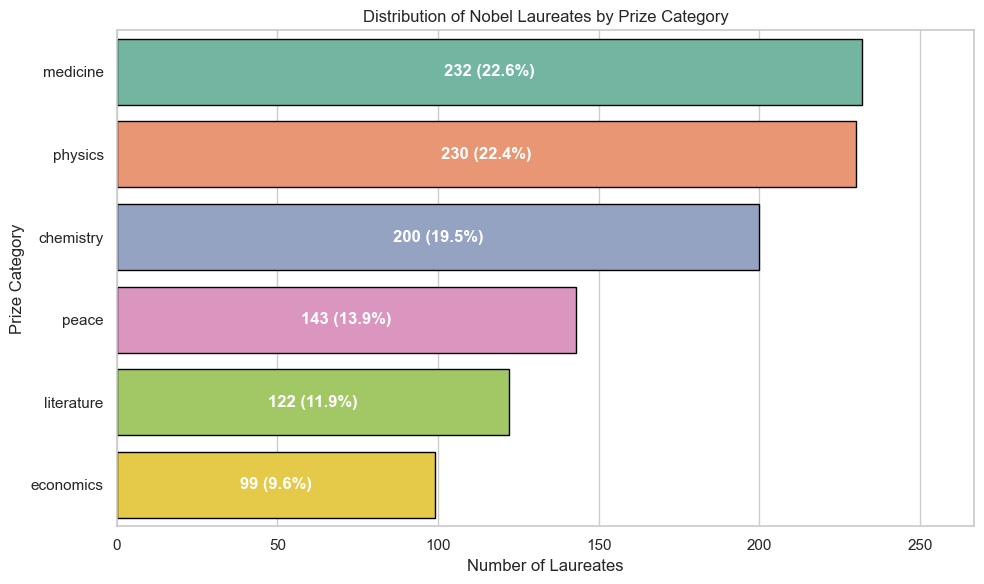

In [76]:
# Select relevant columns (dataset is assumed to have one row per laureate)
df = df[["Year", "Category", "Born_Country", "Gender", "Continent", "Share"]]

# Count laureates per category (each row is one laureate)
category_counts = df.groupby("Category").size().reset_index(name="Count")

# Sort categories by count in descending order and reset index for aligned annotation
category_counts = category_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Calculate percentage for each category
total_count = category_counts["Count"].sum()
category_counts["Percentage"] = (category_counts["Count"] / total_count) * 100

# Set plot style
sns.set(style="whitegrid")

# Create horizontal bar plot with a pleasant, higher-contrast palette
plt.figure(figsize=(10, 6))

# Enforce plotting order to match our sorted DataFrame to avoid misalignment
order = category_counts["Category"].tolist()
ax = sns.barplot(
    data=category_counts,
    y="Category",
    x="Count",
    order=order,
    palette="Set2",  # pastel but distinct; can switch to "Set3" if you want more variety
    edgecolor="black"
)

# Annotate each bar with count and percentage
# Use a dynamic rule: if the bar is small, place text outside with black color; otherwise inside with white.
max_count = category_counts["Count"].max()
threshold = 0.12 * max_count  # adjust threshold for readability

for i, row in category_counts.iterrows():
    bar_length = row["Count"]
    label_text = f'{row["Count"]} ({row["Percentage"]:.1f}%)'
    if bar_length > threshold:
        # Place label inside the bar, centered horizontally
        ax.text(
            bar_length / 2, i, label_text,
            ha="center", va="center",
            color="white", fontsize=12, fontweight="bold"
        )
    else:
        # Place label slightly outside the bar, to the right
        ax.text(
            bar_length + (0.02 * max_count), i, label_text,
            ha="left", va="center",
            color="black", fontsize=12, fontweight="bold"
        )

# Titles and labels
ax.set_title("Distribution of Nobel Laureates by Prize Category")
ax.set_xlabel("Number of Laureates")
ax.set_ylabel("Prize Category")

# Optional: extend x-limit to ensure outside labels are visible even for very small bars
ax.set_xlim(0, max_count * 1.15)

# Step 10: Layout and show
plt.tight_layout()
plt.show()


### Distribution of Nobel Laureates by Gender  
This cell groups the dataset by gender and counts the number of laureates in each category.  
It calculates percentages, sorts genders by total count, and creates a horizontal bar chart with a pastel palette.  
Each bar is annotated with both the raw count and percentage, placed inside or outside depending on readability.  
The chart provides a clear visual comparison of Nobel Prize distribution across genders.


C:\Users\habib\AppData\Local\Temp\ipykernel_29488\3610398333.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=gender_counts, y="Gender", x="Count", order=order, palette="Set3", edgecolor="black")


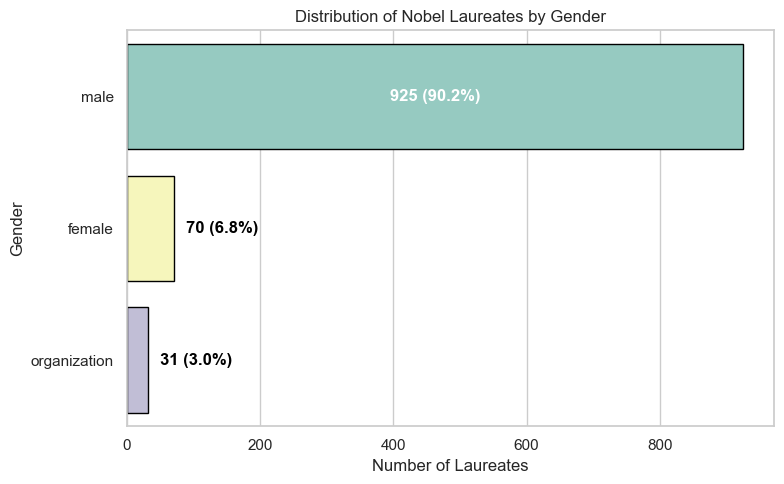

In [77]:
# Group by Gender and count laureates
gender_counts = df.groupby("Gender").size().reset_index(name="Count")

# Sort genders by count in descending order
gender_counts = gender_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Calculate percentage for each gender
total_count = gender_counts["Count"].sum()
gender_counts["Percentage"] = (gender_counts["Count"] / total_count) * 100

# Set plot style
sns.set(style="whitegrid")

# Create horizontal bar plot with pastel palette
plt.figure(figsize=(8, 5))
order = gender_counts["Gender"].tolist()
ax = sns.barplot(data=gender_counts, y="Gender", x="Count", order=order, palette="Set3", edgecolor="black")

# Annotate each bar with count and percentage
max_count = gender_counts["Count"].max()
threshold = 0.12 * max_count

for i, row in gender_counts.iterrows():
    bar_length = row["Count"]
    label_text = f'{row["Count"]} ({row["Percentage"]:.1f}%)'
    if bar_length > threshold:
        ax.text(bar_length / 2, i, label_text,
                ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    else:
        ax.text(bar_length + (0.02 * max_count), i, label_text,
                ha="left", va="center", color="black", fontsize=12, fontweight="bold")

# Titles and labels
ax.set_title("Distribution of Nobel Laureates by Gender")
ax.set_xlabel("Number of Laureates")
ax.set_ylabel("Gender")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Top 15 Countries of Birth for Nobel Laureates  
This cell groups the dataset by country of birth and counts the number of laureates per country.  
It calculates percentages, sorts countries by total count, and selects the top 15 for readability.  
A horizontal bar chart is created with distinct colors, where each bar is annotated with both the raw count and percentage.  
For the United States, the label is placed inside the bar for emphasis, while for other countries it is placed outside.  
The chart highlights the leading countries in Nobel Prize achievements.


C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1212759746.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


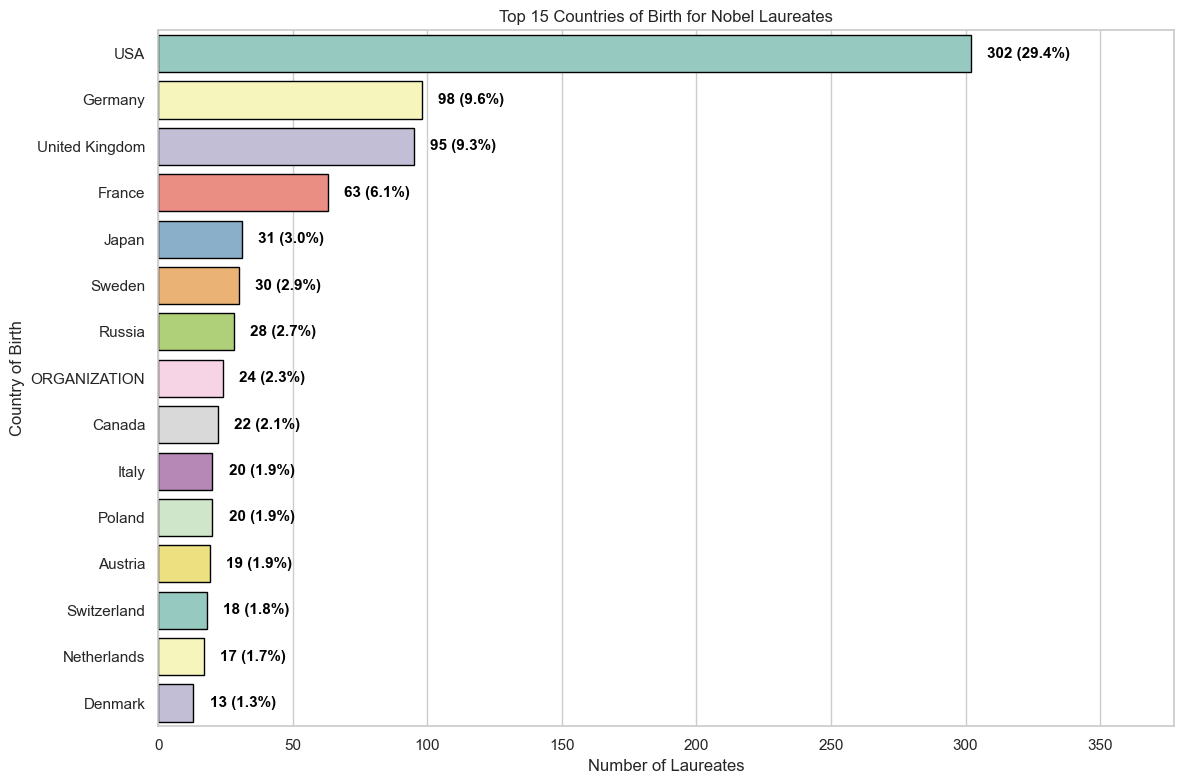

In [78]:
# Group by Born_Country and count laureates
country_counts = df.groupby("Born_Country").size().reset_index(name="Count")

# Sort countries by count in descending order
country_counts = country_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Calculate percentage for each country
total_count = country_counts["Count"].sum()
country_counts["Percentage"] = (country_counts["Count"] / total_count) * 100

# Set plot style
sns.set(style="whitegrid")

# Create horizontal bar plot (top 15 countries for readability)
plt.figure(figsize=(12, 8))
top_countries = country_counts.head(15)
order = top_countries["Born_Country"].tolist()
ax = sns.barplot(
    data=top_countries,
    y="Born_Country",
    x="Count",
    order=order,
    palette="Set3",
    edgecolor="black"
)

# Annotate each bar with count and percentage
max_count = top_countries["Count"].max()

for i, row in top_countries.iterrows():
    bar_length = row["Count"]
    label_text = f'{row["Count"]} ({row["Percentage"]:.1f}%)'
    
    if row["Born_Country"] == "United States":
        # Place label inside the bar for USA
        ax.text(
            bar_length / 2, i, label_text,
            ha="center", va="center",
            color="white", fontsize=11, fontweight="bold"
        )
    else:
        # Place label outside the bar for all other countries
        ax.text(
            bar_length + (0.02 * max_count), i, label_text,
            ha="left", va="center",
            color="black", fontsize=11, fontweight="bold"
        )

# Titles and labels
ax.set_title("Top 15 Countries of Birth for Nobel Laureates")
ax.set_xlabel("Number of Laureates")
ax.set_ylabel("Country of Birth")

# Extend x-axis limit to ensure outside labels are visible
ax.set_xlim(0, max_count * 1.25)

plt.tight_layout()
plt.show()


### Distribution of Nobel Laureates by Continent  
This cell groups the dataset by continent and counts the number of laureates in each region.  
It calculates percentages, sorts continents by total count, and creates a horizontal bar chart with distinct colors.  
Each bar is annotated with both the raw count and percentage, placed inside or outside depending on readability.  
The chart provides a clear overview of how Nobel Prizes are distributed across continents.


C:\Users\habib\AppData\Local\Temp\ipykernel_29488\3064103155.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


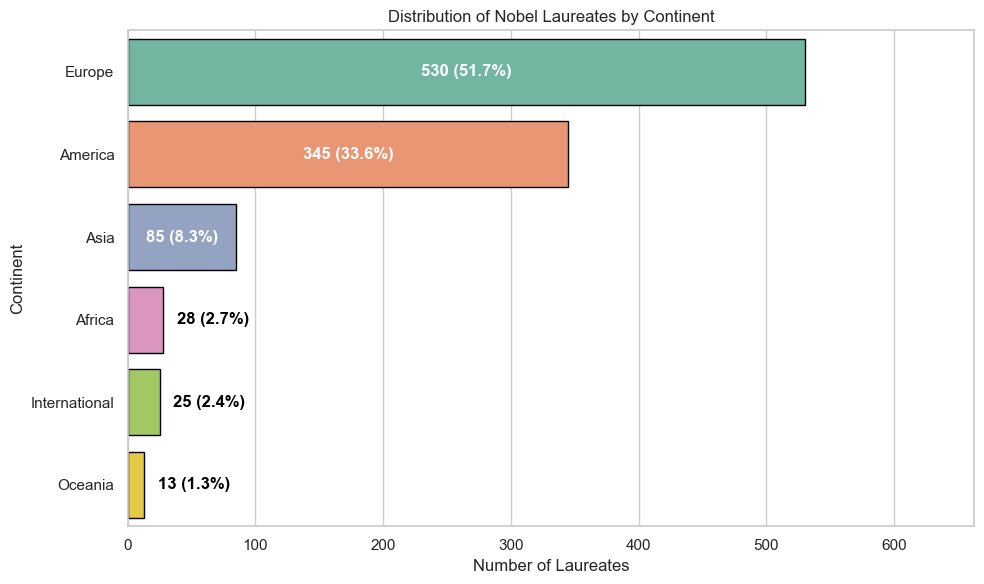

In [79]:
# Group by Continent and count laureates
continent_counts = df.groupby("Continent").size().reset_index(name="Count")

# Sort continents by count in descending order
continent_counts = continent_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Calculate percentage for each continent
total_count = continent_counts["Count"].sum()
continent_counts["Percentage"] = (continent_counts["Count"] / total_count) * 100

# Set plot style
sns.set(style="whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
order = continent_counts["Continent"].tolist()
ax = sns.barplot(
    data=continent_counts,
    y="Continent",
    x="Count",
    order=order,
    palette="Set2",
    edgecolor="black"
)

# Annotate each bar with count and percentage
max_count = continent_counts["Count"].max()
threshold = 0.12 * max_count

for i, row in continent_counts.iterrows():
    bar_length = row["Count"]
    label_text = f'{row["Count"]} ({row["Percentage"]:.1f}%)'
    if bar_length > threshold:
        # Place label inside the bar for large values
        ax.text(
            bar_length / 2, i, label_text,
            ha="center", va="center",
            color="white", fontsize=12, fontweight="bold"
        )
    else:
        # Place label outside the bar for small values
        ax.text(
            bar_length + (0.02 * max_count), i, label_text,
            ha="left", va="center",
            color="black", fontsize=12, fontweight="bold"
        )

# Titles and labels
ax.set_title("Distribution of Nobel Laureates by Continent")
ax.set_xlabel("Number of Laureates")
ax.set_ylabel("Continent")

# Extend x-axis limit to ensure outside labels are visible
ax.set_xlim(0, max_count * 1.25)

plt.tight_layout()
plt.show()


### Distribution of Female Nobel Laureates by Prize Category  
This cell filters the dataset to include only female laureates, normalizing case for consistency.  
It groups the data by prize category, reindexes to ensure all categories are represented (filling missing values with zero), and calculates percentages.  
The results are sorted by count, and a horizontal bar chart is created with distinct colors.  
Each bar is annotated with both the raw count and percentage, ensuring readability even for small values.  
The chart highlights how female Nobel laureates are distributed across different prize categories.


C:\Users\habib\AppData\Local\Temp\ipykernel_29488\136422121.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


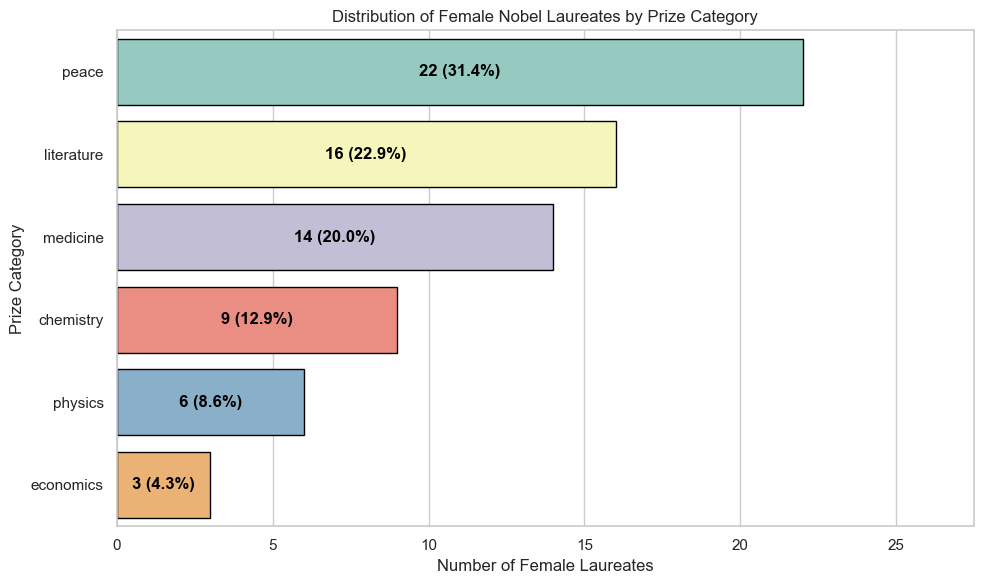

In [80]:
# Filter only female laureates (normalize case)
female_df = df[df["Gender"].str.lower() == "female"]
# print(female_df)
# Group by Category and count female laureates
female_counts = female_df.groupby("Category").size().reset_index(name="Count")

# Reindex to include all categories (fill missing with 0)
all_categories = ["physics", "chemistry", "medicine", "peace", "literature", "economics"]
female_counts = (
    female_counts.set_index("Category")
    .reindex(all_categories, fill_value=0)
    .reset_index()
)

# print(female_counts)
# Calculate percentage safely
total_female = female_counts["Count"].sum()
female_counts["Percentage"] = (female_counts["Count"] / total_female * 100) if total_female > 0 else 0

# Sort categories by count descending
female_counts = female_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Plot style
sns.set(style="whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
order = female_counts["Category"].tolist()
ax = sns.barplot(
    data=female_counts,
    y="Category",
    x="Count",
    order=order,
    palette="Set3",
    edgecolor="black"
)

# Annotate each bar with count and percentage
max_count = female_counts["Count"].max()
safe_max = max(max_count, 1)
threshold = 0.12 * safe_max

for i, row in female_counts.iterrows():
    bar_length = row["Count"]
    label_text = f'{row["Count"]} ({row["Percentage"]:.1f}%)'
    if bar_length >= threshold and bar_length > 0:
        ax.text(bar_length / 2, i, label_text,
                ha="center", va="center", color="black", fontsize=12, fontweight="bold")
    else:
        ax.text(bar_length + (0.02 * safe_max), i, label_text,
                ha="left", va="center", color="black", fontsize=12, fontweight="bold")

# Titles and labels
ax.set_title("Distribution of Female Nobel Laureates by Prize Category")
ax.set_xlabel("Number of Female Laureates")
ax.set_ylabel("Prize Category")

# Step 10: Extend x-axis limit
ax.set_xlim(0, safe_max * 1.25)

plt.tight_layout()
plt.show()


### Distribution of Male Nobel Laureates by Prize Category  
This cell filters the dataset to include only male laureates.  
It groups the data by prize category, ensures all categories are represented (filling missing values with zero), and calculates percentages.  
The results are sorted by count, and a horizontal bar chart is created with distinct colors.  
Each bar is annotated with both the raw count and percentage, placed inside for large values and outside for smaller ones.  
The chart provides a clear overview of how male Nobel laureates are distributed across different prize categories.


C:\Users\habib\AppData\Local\Temp\ipykernel_29488\419898381.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


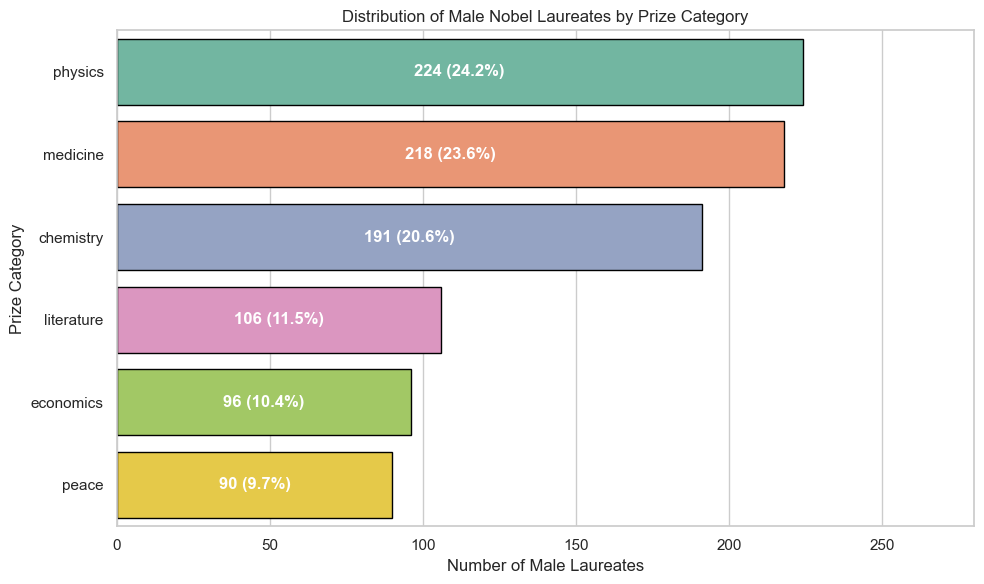

In [81]:
# Filter only male laureates
male_df = df[df["Gender"] == "male"]

# Group by Category and count male laureates
male_counts = male_df.groupby("Category").size().reset_index(name="Count")

# Reindex to include all categories (fill missing with 0)
all_categories = ["physics", "chemistry", "medicine", "peace", "literature", "economics"]
male_counts = male_counts.set_index("Category").reindex(all_categories, fill_value=0).reset_index()

# Calculate percentage safely
total_male = male_counts["Count"].sum()
male_counts["Percentage"] = (male_counts["Count"] / total_male * 100) if total_male > 0 else 0

# Sort categories by count descending
male_counts = male_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Plot style
sns.set(style="whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
order = male_counts["Category"].tolist()
ax = sns.barplot(
    data=male_counts,
    y="Category",
    x="Count",
    order=order,
    palette="Set2",
    edgecolor="black"
)

# Annotate each bar with count and percentage
max_count = male_counts["Count"].max()
safe_max = max(max_count, 1)
threshold = 0.12 * safe_max

for i, row in male_counts.iterrows():
    bar_length = row["Count"]
    label_text = f'{row["Count"]} ({row["Percentage"]:.1f}%)'
    if bar_length >= threshold and bar_length > 0:
        ax.text(bar_length / 2, i, label_text,
                ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    else:
        ax.text(bar_length + (0.02 * safe_max), i, label_text,
                ha="left", va="center", color="black", fontsize=12, fontweight="bold")

# Titles and labels
ax.set_title("Distribution of Male Nobel Laureates by Prize Category")
ax.set_xlabel("Number of Male Laureates")
ax.set_ylabel("Prize Category")

# Step 10: Extend x-axis limit
ax.set_xlim(0, safe_max * 1.25)

plt.tight_layout()
plt.show()


### Load World Countries Shapefile and Inspect Columns  
This cell loads the shapefile containing world country boundaries into a GeoDataFrame.  
It then prints the available column names so we can identify the correct field (e.g., `ADMIN`) that stores country names for later merging with Nobel laureate data.


In [82]:
# Load world countries shapefile
world = gpd.read_file("./Data/ne_110m_admin_0_countries.shp")

# Inspect columns to identify correct country name field
print(world.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


### World Map Heatmap of Nobel Laureates by Country of Birth  
This cell aligns country names between the Nobel dataset and the world shapefile using a mapping dictionary.  
It separates organizational laureates, counts Nobel laureates per country, and merges the results with geographic boundaries.  
A choropleth map is plotted with a white-to-red gradient, gray borders, and labels for countries with more than 30 laureates as well as Iran.  
Finally, the number of organizational laureates is printed.  
This visualization highlights the global distribution of Nobel Prize winners by country of birth.


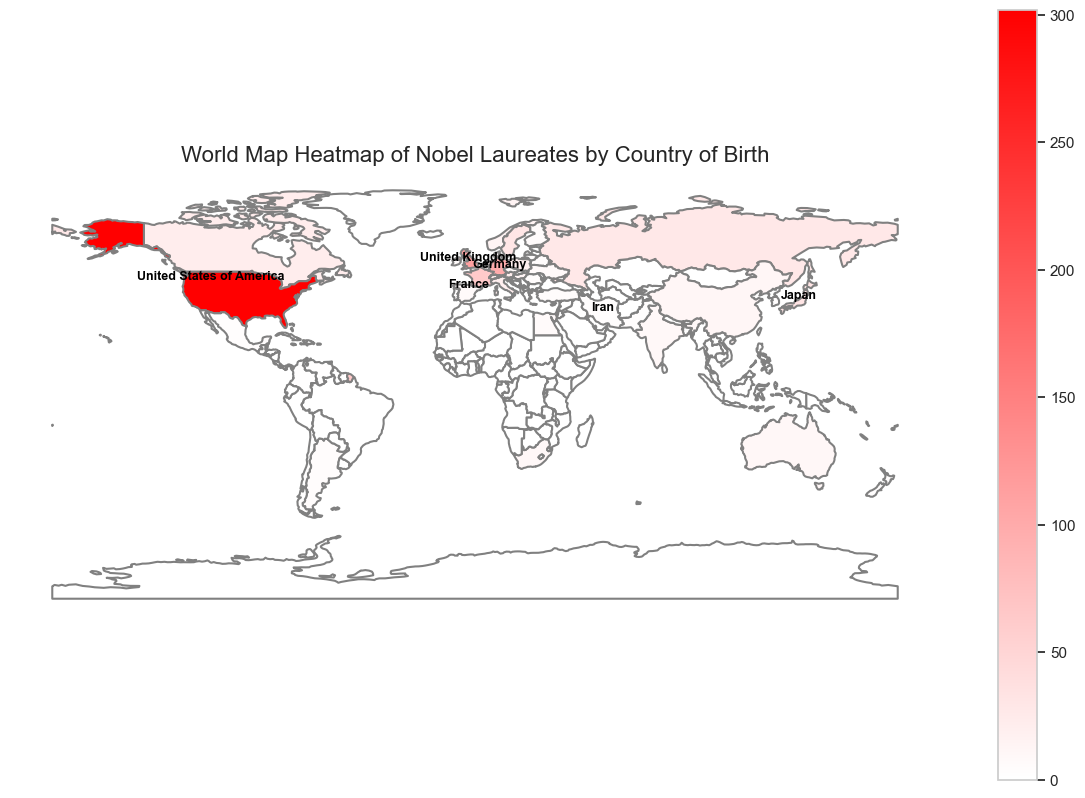

Organizational laureates: 27


In [83]:
world['ADMIN'].values
df['Born_Country'].unique()


# Load shapefile
world = gpd.read_file("./Data/ne_110m_admin_0_countries.shp")

# Mapping dictionary
country_mapping = {
    "USA": "United States of America",
    "UK": "United Kingdom",
    "Netherland": "Netherlands",
    "Switzerlands": "Switzerland",
    "Czech Republic": "Czechia",
    "Tunisia ": "Tunisia",
    "Tanzania ": "United Republic of Tanzania",
    "Belarus ": "Belarus",
    "Scotland": "United Kingdom",
    "Northern Ireland": "United Kingdom",
    "Europe": None,
    "UN": None,
    "ORGANIZATION": None,
    "Tibet": None
}

# Apply mapping
df["Born_Country"] = df["Born_Country"].replace(country_mapping)

# Separate organizations
org_df = df[df["Born_Country"].isna()]
country_df = df[df["Born_Country"].notna()]

# Count Nobel laureates
country_counts = country_df.groupby("Born_Country").size().reset_index(name="Count")

# Merge with shapefile
world_counts = world.merge(country_counts, how="left", left_on="ADMIN", right_on="Born_Country")
world_counts["Count"] = world_counts["Count"].fillna(0)

# Create custom colormap (white to red)
cmap = mcolors.LinearSegmentedColormap.from_list("white_red", ["white", "red"])

# Plot map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_counts.plot(
    column="Count",
    cmap=cmap,              # White to red gradient
    linewidth=1.5,          # Thicker borders
    ax=ax,
    edgecolor="gray",       # Dark blue borders
    legend=True
)

# Add labels for countries with >30 laureates or Iran
for idx, row in world_counts.iterrows():
    if row["Count"] > 30 or row["ADMIN"] == "Iran":
        if row["geometry"] is not None:
            centroid = row["geometry"].centroid
            ax.text(
                centroid.x, centroid.y,
                row["ADMIN"],
                fontsize=9,
                color="black",
                ha="center",
                weight="bold"
            )

# Step 10: Title and axis
ax.set_title("World Map Heatmap of Nobel Laureates by Country of Birth", fontsize=16)
ax.axis("off")
plt.show()

# Step 11: Print organizational laureates
print("Organizational laureates:", len(org_df))


### World Map Heatmap of Nobel Laureates by Continent  
This cell loads the world shapefile and merges it with Nobel laureate data aggregated by continent.  
It counts laureates per continent, applies a white-to-orange colormap, and plots a choropleth map with gray borders.  
Labels for each continent are added at their geographic centroids to improve readability.  
The visualization highlights the distribution of Nobel Prize winners across continents.


C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1000859077.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = subset.unary_union.centroid
C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1000859077.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = subset.unary_union.centroid
C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1000859077.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = subset.unary_union.centroid
C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1000859077.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = subset.unary_union.centroid
C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1000859077.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method 

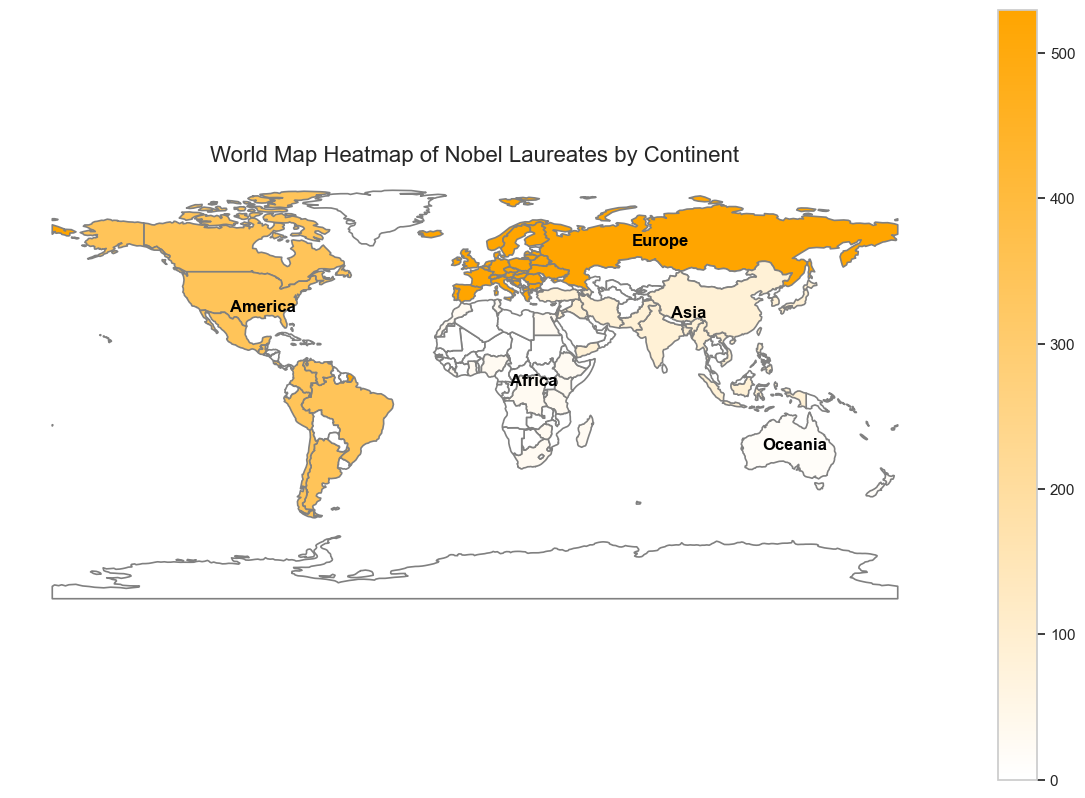

In [84]:
# Load shapefile
world = gpd.read_file("./Data/ne_110m_admin_0_countries.shp")

# Count Nobel laureates by continent
continent_counts = df.groupby("Continent").size().reset_index(name="Count")

# Map countries to continents from df
continent_map = df[["Born_Country", "Continent"]].drop_duplicates()

# Merge shapefile with continent info
world_continent = world.merge(continent_map, how="left", left_on="ADMIN", right_on="Born_Country")
world_continent = world_continent.merge(continent_counts, how="left", on="Continent")
world_continent["Count"] = world_continent["Count"].fillna(0)

# Create custom colormap (white to orange)
cmap = mcolors.LinearSegmentedColormap.from_list("white_orange", ["white", "orange"])

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_continent.plot(
    column="Count",
    cmap=cmap,
    linewidth=1.2,
    ax=ax,
    edgecolor="gray",   # Gray borders
    legend=True
)

# Add labels for all continents
for cont in continent_counts["Continent"].unique():
    subset = world_continent[world_continent["Continent"] == cont]
    if not subset.empty:
        centroid = subset.unary_union.centroid
        ax.text(
            centroid.x, centroid.y,
            cont,
            fontsize=12,
            color="black",   # Black labels
            ha="center",
            weight="bold"
        )

# Title and axis
ax.set_title("World Map Heatmap of Nobel Laureates by Continent", fontsize=16)
ax.axis("off")
plt.show()


### Distribution of Nobel Prizes by Category for Top 5 Countries  
This cell identifies the five countries with the highest number of Nobel laureates and filters the dataset accordingly.  
It groups the laureates by prize category and country, then creates a horizontal bar chart with distinct colors for each country.  
Labels showing the exact counts are added next to each bar for clarity.  
The visualization highlights how Nobel Prizes are distributed across categories within the leading five countries.


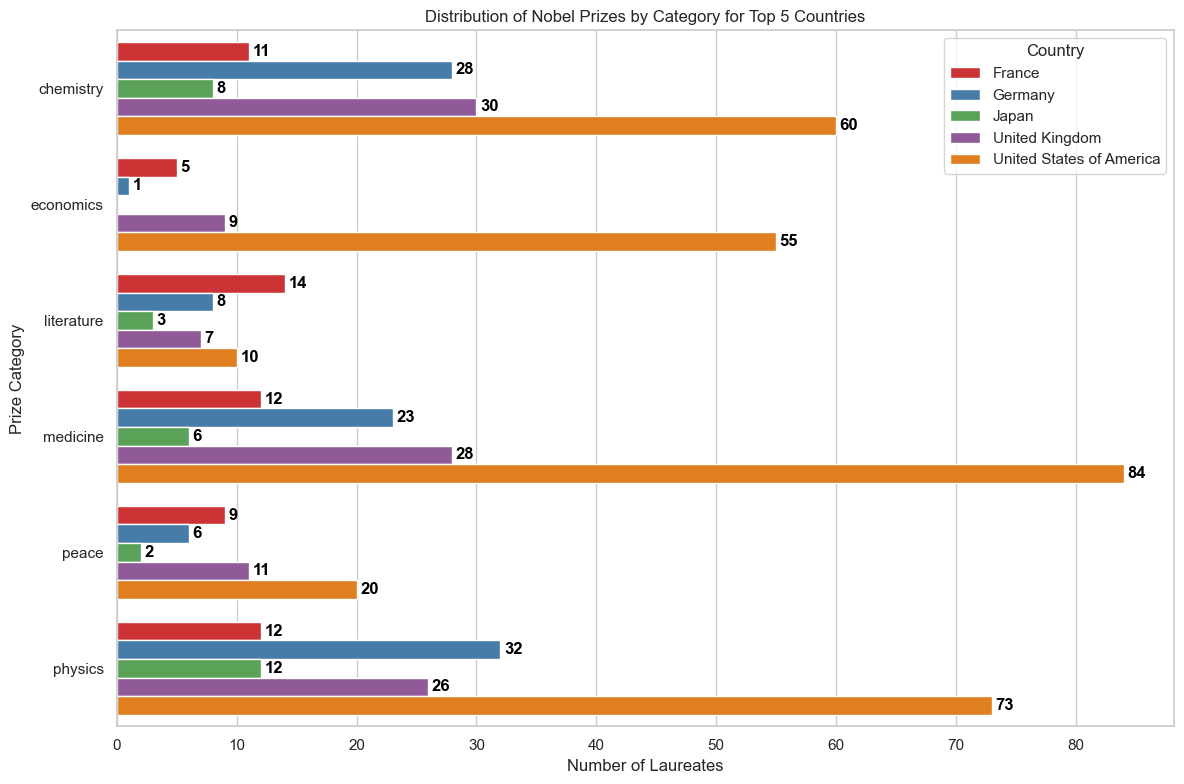

In [85]:
# Find top 5 countries with most Nobel laureates
top5_countries = df['Born_Country'].value_counts().head(5).index

# Filter dataset for these countries
top5_df = df[df['Born_Country'].isin(top5_countries)]

# Count laureates by Prize type for each country
country_prize_counts = top5_df.groupby(['Born_Country','Category']).size().reset_index(name='Count')

# Plot horizontal bar chart with distinct colors
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=country_prize_counts,
    x='Count',
    y='Category',
    hue='Born_Country',
    orient='h',
    palette='Set1'
)

# Add labels on each bar using patches (correct alignment)
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    if width > 0:  # only label non-zero bars
        ax.text(width + 0.3, y, int(width),
                ha='left', va='center',
                color='black', weight='bold')

plt.title('Distribution of Nobel Prizes by Category for Top 5 Countries')
plt.xlabel('Number of Laureates')
plt.ylabel('Prize Category')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


### Trend of Nobel Laureates per Decade for Top 5 Countries  
This cell identifies the five countries with the highest number of Nobel laureates and filters the dataset accordingly.  
It extracts the decade from the year of award, groups laureates by country and decade, and counts totals.  
A line chart is plotted to show how the number of laureates evolves over time, with distinct colors for each country.  
Labels are added to each point to display the exact counts, making the historical trends easy to compare across countries.


C:\Users\habib\AppData\Local\Temp\ipykernel_29488\1810612258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_df['Decade'] = (top5_df['Year'] // 10) * 10


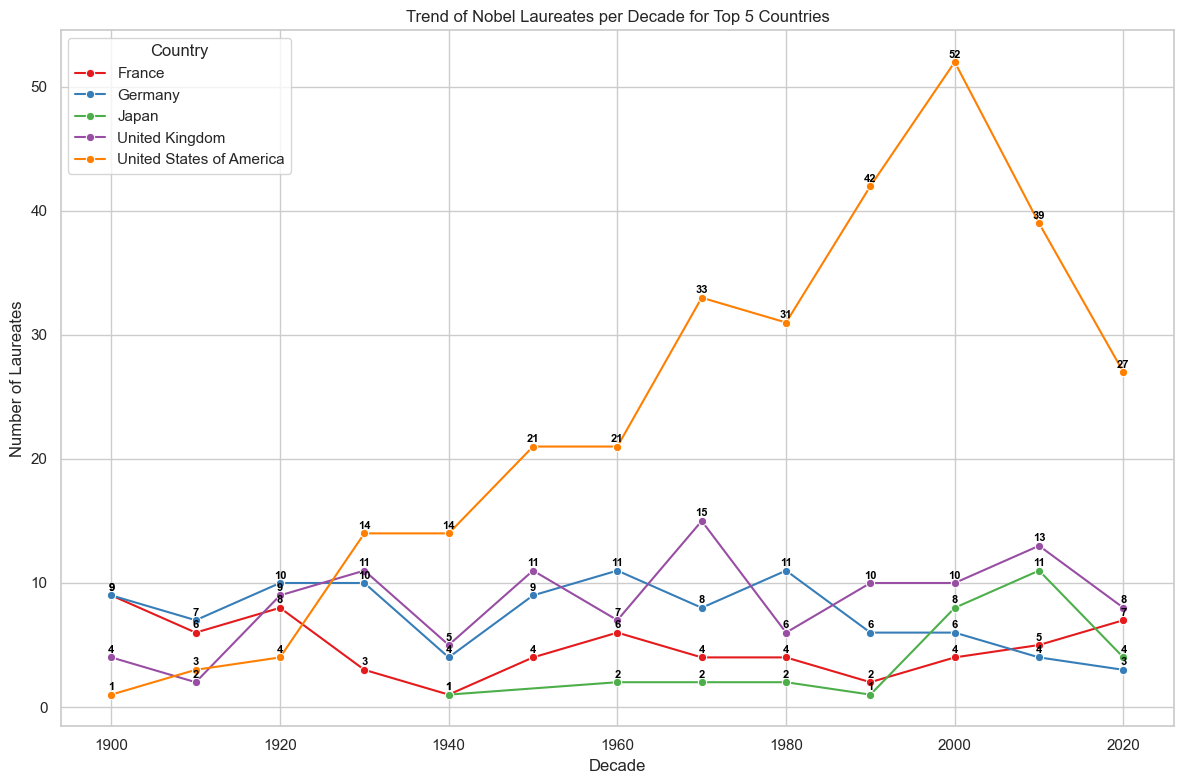

In [86]:
# Find top 5 countries with most Nobel laureates
top5_countries = df['Born_Country'].value_counts().head(5).index

# Filter dataset for these countries
top5_df = df[df['Born_Country'].isin(top5_countries)]

# Extract decade from Year column (assuming df has 'Year')
top5_df['Decade'] = (top5_df['Year'] // 10) * 10

# Count laureates by decade and country
decade_counts = top5_df.groupby(['Born_Country', 'Decade']).size().reset_index(name='Count')

# Plot line chart showing trend per decade
plt.figure(figsize=(12,8))
sns.lineplot(
    data=decade_counts,
    x='Decade',
    y='Count',
    hue='Born_Country',
    marker='o',
    palette='Set1'   # distinct colors
)

# Add labels on each point
for i, row in decade_counts.iterrows():
    plt.text(row['Decade'], row['Count']+0.2, str(row['Count']),
             ha='center', va='bottom', fontsize=8, color='black', weight='bold')

plt.title('Trend of Nobel Laureates per Decade for Top 5 Countries')
plt.xlabel('Decade')
plt.ylabel('Number of Laureates')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


### Trend of Nobel Laureates per Decade by Continent  
This cell extracts the decade from the year of award and groups laureates by continent and decade.  
It counts the number of laureates per continent for each decade and plots a line chart with distinct colors.  
Labels are added to each point to show exact counts, making the temporal trends across continents easy to compare.  
The visualization highlights how Nobel Prize distribution has evolved over time at the continental level.


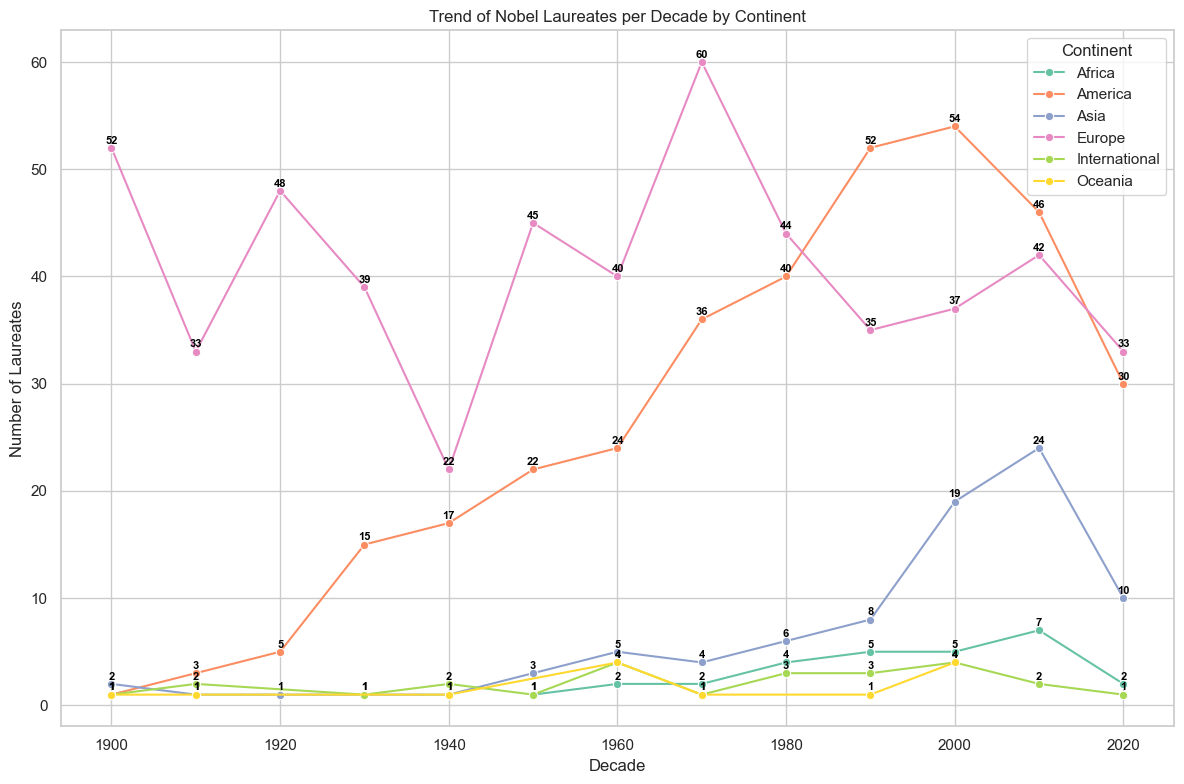

In [87]:
# Extract decade from Year column
df['Decade'] = (df['Year'] // 10) * 10

# Count laureates by decade and continent
continent_decade_counts = df.groupby(['Continent', 'Decade']).size().reset_index(name='Count')

# Plot line chart showing trend per decade for continents
plt.figure(figsize=(12,8))
ax = sns.lineplot(
    data=continent_decade_counts,
    x='Decade',
    y='Count',
    hue='Continent',
    marker='o',
    palette='Set2'   # distinct colors for continents
)

# Add labels on each point
for i, row in continent_decade_counts.iterrows():
    plt.text(row['Decade'], row['Count']+0.2, str(row['Count']),
             ha='center', va='bottom', fontsize=8, color='black', weight='bold')

plt.title('Trend of Nobel Laureates per Decade by Continent')
plt.xlabel('Decade')
plt.ylabel('Number of Laureates')
plt.legend(title='Continent')
plt.tight_layout()
plt.show()
